<a href="https://colab.research.google.com/github/feniltailor22/Natural-Language-Processing/blob/main/Encoder_And_Decoder_Neural_Machine_Learning_Language_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  fra-eng.zip
  inflating: _about.txt              
  inflating: fra.txt                 


In [2]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

In [3]:
batch_size= 64 #Batch size for training data
epochs= 100 #Number of epochs to train for
latent_dim= 256 #Latent dimensionality of the encoding space
num_samples= 10000 #Number of samples to train on

In [4]:
data_path= '/content/fra.txt'
#This is how the text file looks like.

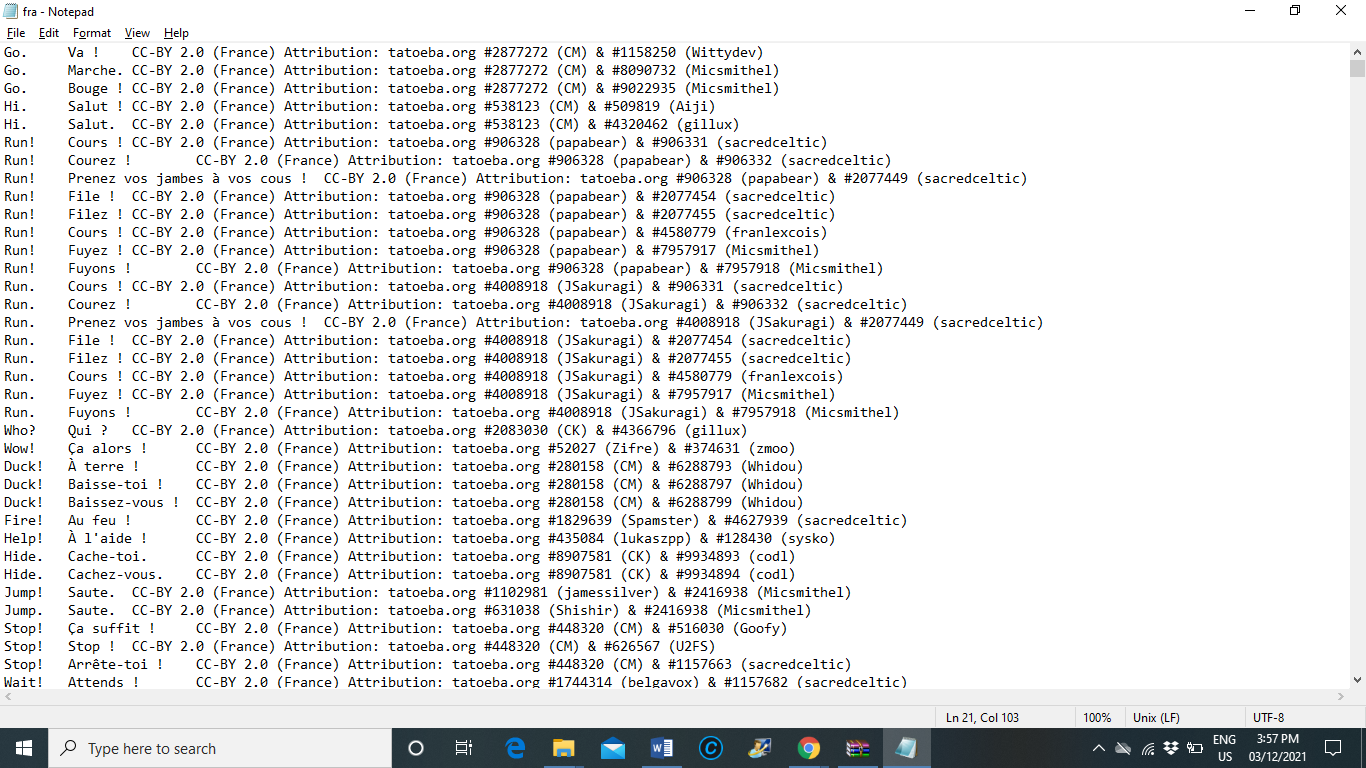

In [5]:
#The input text data (english words) is seperated by Tab to output text data (franch words).
#Now we will vectorize the data.

In [6]:
input_texts= []
target_texts= []
input_characters= set() #set is used to store unique elements.
target_characters= set()

#opening .txt file

with open(file= data_path, mode='r', encoding='utf-8') as f:
  lines= f.read().split('\n')
  #mode='r' means open for reading in text mode.

#traversing through each line and spliting the text into input_text and target_text

for line in lines[: min(num_samples, len(lines)-1)]:
  input_text, target_text, _ = line.split('\t')
  #we use "\t" as the "start sequence" character.
  #for the targets, and "\n" as "end sequence" character.
  target_text= '\t' + target_text + '\n'
  input_texts.append(input_text)
  target_texts.append(target_text)
  for char in input_text:
    if char not in input_characters:
      input_characters.add(char)
  for char in target_text:
    if char not in target_characters:
      target_characters.add(char)      

In [7]:
input_characters

{' ',
 '!',
 '"',
 '$',
 '%',
 '&',
 "'",
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '5',
 '7',
 '8',
 '9',
 ':',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'Y',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'é'}

In [8]:
len(input_characters)

71

In [9]:
target_characters

{'\t',
 '\n',
 ' ',
 '!',
 '%',
 '&',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '5',
 '8',
 '9',
 ':',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'Y',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '\xa0',
 '«',
 '»',
 'À',
 'Ç',
 'É',
 'Ê',
 'à',
 'â',
 'ç',
 'è',
 'é',
 'ê',
 'î',
 'ï',
 'ô',
 'ù',
 'û',
 'œ',
 '\u2009',
 '’',
 '\u202f'}

In [10]:
len(target_characters)

92

In [11]:
input_texts

['Go.',
 'Go.',
 'Go.',
 'Hi.',
 'Hi.',
 'Run!',
 'Run!',
 'Run!',
 'Run!',
 'Run!',
 'Run!',
 'Run!',
 'Run!',
 'Run.',
 'Run.',
 'Run.',
 'Run.',
 'Run.',
 'Run.',
 'Run.',
 'Run.',
 'Who?',
 'Wow!',
 'Duck!',
 'Duck!',
 'Duck!',
 'Fire!',
 'Help!',
 'Hide.',
 'Hide.',
 'Jump!',
 'Jump.',
 'Stop!',
 'Stop!',
 'Stop!',
 'Wait!',
 'Wait!',
 'Wait!',
 'Wait.',
 'Wait.',
 'Wait.',
 'Wait.',
 'Begin.',
 'Begin.',
 'Go on.',
 'Go on.',
 'Go on.',
 'Hello!',
 'Hello!',
 'I see.',
 'I see.',
 'I try.',
 'I won!',
 'I won!',
 'I won.',
 'Oh no!',
 'Relax.',
 'Relax.',
 'Relax.',
 'Relax.',
 'Relax.',
 'Relax.',
 'Relax.',
 'Relax.',
 'Relax.',
 'Relax.',
 'Relax.',
 'Relax.',
 'Smile.',
 'Smile.',
 'Smile.',
 'Sorry?',
 'Attack!',
 'Attack!',
 'Attack!',
 'Buy it.',
 'Buy it.',
 'Buy it.',
 'Buy it.',
 'Cheers!',
 'Cheers!',
 'Cheers!',
 'Cheers!',
 'Eat it.',
 'Eat it.',
 'Get up.',
 'Get up.',
 'Get up.',
 'Go now.',
 'Go now.',
 'Go now.',
 'Got it!',
 'Got it!',
 'Got it!',
 'Got it?',
 '

In [12]:
len(input_texts)

10000

In [13]:
target_texts

['\tVa !\n',
 '\tMarche.\n',
 '\tBouge !\n',
 '\tSalut !\n',
 '\tSalut.\n',
 '\tCours\u202f!\n',
 '\tCourez\u202f!\n',
 '\tPrenez vos jambes à vos cous !\n',
 '\tFile !\n',
 '\tFilez !\n',
 '\tCours !\n',
 '\tFuyez !\n',
 '\tFuyons !\n',
 '\tCours\u202f!\n',
 '\tCourez\u202f!\n',
 '\tPrenez vos jambes à vos cous !\n',
 '\tFile !\n',
 '\tFilez !\n',
 '\tCours !\n',
 '\tFuyez !\n',
 '\tFuyons !\n',
 '\tQui ?\n',
 '\tÇa alors\u202f!\n',
 '\tÀ terre\xa0!\n',
 '\tBaisse-toi\xa0!\n',
 '\tBaissez-vous\xa0!\n',
 '\tAu feu !\n',
 "\tÀ l'aide\u202f!\n",
 '\tCache-toi.\n',
 '\tCachez-vous.\n',
 '\tSaute.\n',
 '\tSaute.\n',
 '\tÇa suffit\u202f!\n',
 '\tStop\u202f!\n',
 '\tArrête-toi !\n',
 '\tAttends !\n',
 '\tAttendez !\n',
 '\tAttendez.\n',
 '\tAttends !\n',
 '\tAttendez !\n',
 '\tAttends.\n',
 '\tAttendez.\n',
 '\tCommencez.\n',
 '\tCommence.\n',
 '\tPoursuis.\n',
 '\tContinuez.\n',
 '\tPoursuivez.\n',
 '\tBonjour !\n',
 '\tSalut !\n',
 '\tJe comprends.\n',
 '\tAha.\n',
 "\tJ'essaye.\n",
 "\tJ'

In [14]:
len(target_texts)

10000

In [15]:
input_characters= sorted(list(input_characters))
target_characters= sorted(list(target_characters))
num_encoder_tokens= len(input_characters)
num_decoder_tokens= len(target_characters)
max_encoder_seq_length= max([len(txt) for txt in input_texts])
max_decoder_seq_length= max([len(txt) for txt in target_texts])

In [16]:
print('Number of samples: ', len(input_texts)) #number of sample sentences 
print('Number of unique input tokens: ', num_encoder_tokens) #unique english characters
print('Number of unique output tokens: ', num_decoder_tokens) #unique french characters
print('Max sequence length for inputs: ', max_encoder_seq_length) #max_english_sentence_length
print('Max sequence length for outputs: ', max_decoder_seq_length) #max_french_sentence_length

Number of samples:  10000
Number of unique input tokens:  71
Number of unique output tokens:  92
Max sequence length for inputs:  15
Max sequence length for outputs:  59


In [17]:
#Tokenizing input _characters and target_characters 

In [18]:
input_token_index= dict(
    [(char, i) for i, char in enumerate(input_characters)]
)

target_token_index= dict(
    [(char, i) for i, char in enumerate(target_characters)]
)

In [19]:
input_token_index

{' ': 0,
 '!': 1,
 '"': 2,
 '$': 3,
 '%': 4,
 '&': 5,
 "'": 6,
 ',': 7,
 '-': 8,
 '.': 9,
 '0': 10,
 '1': 11,
 '2': 12,
 '3': 13,
 '5': 14,
 '7': 15,
 '8': 16,
 '9': 17,
 ':': 18,
 '?': 19,
 'A': 20,
 'B': 21,
 'C': 22,
 'D': 23,
 'E': 24,
 'F': 25,
 'G': 26,
 'H': 27,
 'I': 28,
 'J': 29,
 'K': 30,
 'L': 31,
 'M': 32,
 'N': 33,
 'O': 34,
 'P': 35,
 'Q': 36,
 'R': 37,
 'S': 38,
 'T': 39,
 'U': 40,
 'V': 41,
 'W': 42,
 'Y': 43,
 'a': 44,
 'b': 45,
 'c': 46,
 'd': 47,
 'e': 48,
 'f': 49,
 'g': 50,
 'h': 51,
 'i': 52,
 'j': 53,
 'k': 54,
 'l': 55,
 'm': 56,
 'n': 57,
 'o': 58,
 'p': 59,
 'q': 60,
 'r': 61,
 's': 62,
 't': 63,
 'u': 64,
 'v': 65,
 'w': 66,
 'x': 67,
 'y': 68,
 'z': 69,
 'é': 70}

In [20]:
target_token_index

{'\t': 0,
 '\n': 1,
 ' ': 2,
 '!': 3,
 '%': 4,
 '&': 5,
 "'": 6,
 '(': 7,
 ')': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 '0': 12,
 '1': 13,
 '2': 14,
 '3': 15,
 '5': 16,
 '8': 17,
 '9': 18,
 ':': 19,
 '?': 20,
 'A': 21,
 'B': 22,
 'C': 23,
 'D': 24,
 'E': 25,
 'F': 26,
 'G': 27,
 'H': 28,
 'I': 29,
 'J': 30,
 'K': 31,
 'L': 32,
 'M': 33,
 'N': 34,
 'O': 35,
 'P': 36,
 'Q': 37,
 'R': 38,
 'S': 39,
 'T': 40,
 'U': 41,
 'V': 42,
 'Y': 43,
 'a': 44,
 'b': 45,
 'c': 46,
 'd': 47,
 'e': 48,
 'f': 49,
 'g': 50,
 'h': 51,
 'i': 52,
 'j': 53,
 'k': 54,
 'l': 55,
 'm': 56,
 'n': 57,
 'o': 58,
 'p': 59,
 'q': 60,
 'r': 61,
 's': 62,
 't': 63,
 'u': 64,
 'v': 65,
 'w': 66,
 'x': 67,
 'y': 68,
 'z': 69,
 '\xa0': 70,
 '«': 71,
 '»': 72,
 'À': 73,
 'Ç': 74,
 'É': 75,
 'Ê': 76,
 'à': 77,
 'â': 78,
 'ç': 79,
 'è': 80,
 'é': 81,
 'ê': 82,
 'î': 83,
 'ï': 84,
 'ô': 85,
 'ù': 86,
 'û': 87,
 'œ': 88,
 '\u2009': 89,
 '’': 90,
 '\u202f': 91}

In [21]:
target_token_index

{'\t': 0,
 '\n': 1,
 ' ': 2,
 '!': 3,
 '%': 4,
 '&': 5,
 "'": 6,
 '(': 7,
 ')': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 '0': 12,
 '1': 13,
 '2': 14,
 '3': 15,
 '5': 16,
 '8': 17,
 '9': 18,
 ':': 19,
 '?': 20,
 'A': 21,
 'B': 22,
 'C': 23,
 'D': 24,
 'E': 25,
 'F': 26,
 'G': 27,
 'H': 28,
 'I': 29,
 'J': 30,
 'K': 31,
 'L': 32,
 'M': 33,
 'N': 34,
 'O': 35,
 'P': 36,
 'Q': 37,
 'R': 38,
 'S': 39,
 'T': 40,
 'U': 41,
 'V': 42,
 'Y': 43,
 'a': 44,
 'b': 45,
 'c': 46,
 'd': 47,
 'e': 48,
 'f': 49,
 'g': 50,
 'h': 51,
 'i': 52,
 'j': 53,
 'k': 54,
 'l': 55,
 'm': 56,
 'n': 57,
 'o': 58,
 'p': 59,
 'q': 60,
 'r': 61,
 's': 62,
 't': 63,
 'u': 64,
 'v': 65,
 'w': 66,
 'x': 67,
 'y': 68,
 'z': 69,
 '\xa0': 70,
 '«': 71,
 '»': 72,
 'À': 73,
 'Ç': 74,
 'É': 75,
 'Ê': 76,
 'à': 77,
 'â': 78,
 'ç': 79,
 'è': 80,
 'é': 81,
 'ê': 82,
 'î': 83,
 'ï': 84,
 'ô': 85,
 'ù': 86,
 'û': 87,
 'œ': 88,
 '\u2009': 89,
 '’': 90,
 '\u202f': 91}

####(1) Turn the sentences into 3 Numpy arrays, encoder_input_data,    decoder_input_data, decoder_target_data:



*   encoder_input_data is a 3D array of shape (num_pairs, max_english_sentence_length, num_english_characters) containing a one-hot vectorization of the English sentences.
*   decoder_input_data is a 3D array of shape (num_pairs, max_french_sentence_length, num_french_characters) containg a one-hot vectorization of the French sentences.
*   decoder_target_data is the same as decoder_input_data but offset by one timestep. decoder_target_data[:, t, :] will be the same as decoder_input_data[:, t + 1, :].

In [22]:
print('Number of samples: ', len(input_texts)) #number of sample sentences 
print('Number of unique input tokens: ', num_encoder_tokens) #unique english characters
print('Number of unique output tokens: ', num_decoder_tokens) #unique french characters
print('Max sequence length for inputs: ', max_encoder_seq_length) #max_english_sentence_length
print('Max sequence length for outputs: ', max_decoder_seq_length) #max_french_sentence_length

Number of samples:  10000
Number of unique input tokens:  71
Number of unique output tokens:  92
Max sequence length for inputs:  15
Max sequence length for outputs:  59


In [23]:
encoder_input_data= np.zeros(
  (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
  dtype= 'float32' 
)
  
decoder_input_data= np.zeros(
  (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
  dtype= 'float32' 
)

decoder_target_data= np.zeros(
  (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
   dtype= 'float32' 
)

In [24]:
#one hot representation

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
  for t, char in enumerate(input_text):
    encoder_input_data[i, t, input_token_index[char]]= 1.
  encoder_input_data[i, t+1:, input_token_index[' ']]= 1.
  for t, char in enumerate(target_text):
    # decoder_target_data is ahead of decoder_input_data by one timestep.
    decoder_input_data[i, t, target_token_index[char]]= 1.
    if t > 0:
      # decoder_target_data is ahead of decoder_input_data by one timestep.
      # it will not include the start character.
      decoder_target_data[i, t-1, target_token_index[char]]= 1.
  decoder_input_data[i, t+1:, target_token_index[' ']]= 1.
  decoder_target_data[i, t:, target_token_index[' ']]= 1.

In [25]:
encoder_input_data[0].shape

(15, 71)

####(2) Train a basic LSTM-based Seq2Seq model to predict decoder_target_data given encoder_input_data and decoder_input_data. Our model uses teacher forcing.

In [26]:
#Define input sequence and process it.

encoder_inputs= Input(shape=(None, num_encoder_tokens))
encoder_lstm= LSTM(units= latent_dim, return_state= True)
encoder_outputs, state_h, state_c= encoder_lstm(encoder_inputs)
#we will discard the 'encoder_outputs' and only keep the states.
encoder_states= [state_h, state_c]

In [27]:
#Set up the decoder, using 'encoder_states' as intial state.

decoder_inputs= Input(shape=(None, num_decoder_tokens))
#we set up our decoder to return full output sequences, and to return initial state as well.
#we don't use the return states in training model, but we will use them in inference.
decoder_lstm= LSTM(units=latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs)
decoder_dense= Dense(units= num_decoder_tokens, activation='softmax')
decoder_outputs= decoder_dense(decoder_outputs)

In [28]:
#Define the model that will turn 'encoder_input_data' & 'decoder_input_data' into 'decoder_target_data'.

model= Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [29]:
#Run Training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    x=[encoder_input_data, decoder_input_data],
    y=decoder_target_data,
    batch_size= 64,
    epochs=10,
    validation_split=0.2
    )

Epoch 1/10
125/125 [==============================] - 44s 332ms/step - loss: 1.2207 - accuracy: 0.7295 - val_loss: 1.0800 - val_accuracy: 0.7059
Epoch 2/10
125/125 [==============================] - 42s 335ms/step - loss: 0.9240 - accuracy: 0.7613 - val_loss: 0.9215 - val_accuracy: 0.7407
Epoch 3/10
125/125 [==============================] - 42s 338ms/step - loss: 0.7467 - accuracy: 0.7918 - val_loss: 0.7735 - val_accuracy: 0.7820
Epoch 4/10
125/125 [==============================] - 41s 330ms/step - loss: 0.6413 - accuracy: 0.8202 - val_loss: 0.6858 - val_accuracy: 0.7989
Epoch 5/10
125/125 [==============================] - 41s 332ms/step - loss: 0.5678 - accuracy: 0.8362 - val_loss: 0.6361 - val_accuracy: 0.8143
Epoch 6/10
125/125 [==============================] - 41s 331ms/step - loss: 0.5303 - accuracy: 0.8461 - val_loss: 0.6053 - val_accuracy: 0.8217
Epoch 7/10
125/125 [==============================] - 41s 326ms/step - loss: 0.5038 - accuracy: 0.8533 - val_loss: 0.5862 - val_ac

####To decode a test sentence, we will repeatedly:

1) Encode the input sentence and retrieve the initial decoder state.

2) Run one step of the decoder with this initial state and a "start of sequence" token as target. The output will be the next target character.

3) Append the target character predicted and repeat.

In [38]:
# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [39]:
# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())

In [42]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [45]:
for seq_index in range(20):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)

-
Input sentence: Go.
Decoded sentence: Je suis conte.

-
Input sentence: Go.
Decoded sentence: Je suis conte.

-
Input sentence: Go.
Decoded sentence: Je suis conte.

-
Input sentence: Hi.
Decoded sentence: Je suis conte.

-
Input sentence: Hi.
Decoded sentence: Je suis conte.

-
Input sentence: Run!
Decoded sentence: Je suis conte.

-
Input sentence: Run!
Decoded sentence: Je suis conte.

-
Input sentence: Run!
Decoded sentence: Je suis conte.

-
Input sentence: Run!
Decoded sentence: Je suis conte.

-
Input sentence: Run!
Decoded sentence: Je suis conte.

-
Input sentence: Run!
Decoded sentence: Je suis conte.

-
Input sentence: Run!
Decoded sentence: Je suis conte.

-
Input sentence: Run!
Decoded sentence: Je suis conte.

-
Input sentence: Run.
Decoded sentence: Je suis conte.

-
Input sentence: Run.
Decoded sentence: Je suis conte.

-
Input sentence: Run.
Decoded sentence: Je suis conte.

-
Input sentence: Run.
Decoded sentence: Je suis conte.

-
Input sentence: Run.
Decoded sente